# DSGRN Pattern Match Tutorial

In [1]:
import graphviz
from DSGRN import *
def DrawGraph(g):
    return graphviz.Source(g.graphviz())
def Wrap(obj):
    wrapped = IntList()
    wrapped.extend(obj)
    return wrapped

In [2]:
network = Network();
network.assign("X : X + Y \n" + "Y : ~X    \n" )

In [3]:
pg = ParameterGraph(network)

In [4]:
search_graph = SearchGraph(DomainGraph(pg.parameter(31)))

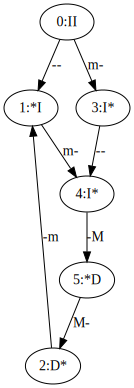

In [5]:
DrawGraph(search_graph)

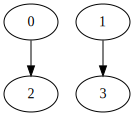

In [6]:
digraph = Digraph()  
digraph . resize ( 4 )
edges = [[0,2],[1,3]]
for edge in edges: digraph.add_edge(edge[0],edge[1])
DrawGraph(digraph)

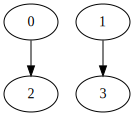

In [7]:
poset = Poset(digraph)
DrawGraph(poset)

In [8]:
events = Wrap([0,1,0,1])
label = 3
dimension = 2

In [9]:
pattern = Pattern(poset,events,label,dimension)

In [10]:
pattern_graph = PatternGraph(pattern);

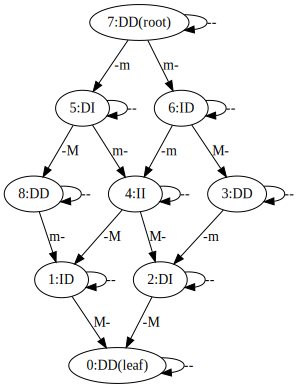

In [11]:
DrawGraph(pattern_graph)

In [12]:
matching_graph = MatchingGraph(search_graph, pattern_graph);

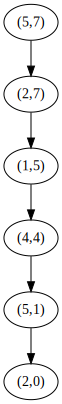

In [13]:
DrawGraph(matching_graph)